# General Insurance Data Model

The intention of this module is to allow the generation of a simple set of data which represents a set of insurance policies. The data generated can then be used to share demonstrations of new actuarial processes, models and software. While there is really no substitute for real data, this is often commercially sensitive, so this may be the next best thing to help share ideas and solutions within the community.

This is an open repository accessible through Github:
https://github.com/pjdyson/general_insurance_data_model/blob/master/README.md#overview

It generates a random portfolio of data to use in reserving tests

## Example
Below is a short example of how to use the library

First, import the library

In [1]:
import generators as gt   #THE module we are testing
import datetime as dt     # this is for processing dates
import pandas as pd       # table structures used in python

### Generate Policy and Claims Data

Next, using the standard settings, create data for three classes of business. By default, this generates 10 years of history, assuming a 3% growth in policy count each year

In [2]:
uw_start_date = dt.datetime.strptime('01/01/2019', '%d/%m/%Y')
data_m, stats_m = gt.generate_ultimate_portfolio(class_name='Motor', uw_start_date=uw_start_date)
data_p, stats_p= gt.generate_ultimate_portfolio(class_name='Property', uw_start_date=uw_start_date)
data_l, stats_l = gt.generate_ultimate_portfolio(class_name='Liability', uw_start_date=uw_start_date)

Join the three data sets together, this shows the policy-level information

In [3]:
data_combined = pd.concat([data_m, data_p, data_l])
data_combined.head()

,Class_name,Start_date,End_date,Policy_premium,Policy_risk_factor_1,Policy_risk_factor_2,Policy_risk_factor_3,Insured_limit,Insured_excess,Claim_value_gu,Claim_value,Claim_incident_date,Claim_report_date,Claim_payment_date,UW_year
Policy_ID,,,,,,,,,,,,,,,
0,Motor,2017-12-31 20:41:51.016241,2019-01-01 02:41:51.016241000,150,-0.825863,1.219597,-0.081495,3000,250,NaN,NaN,NaT,NaT,NaT,2017
1,Motor,2018-01-01 11:33:25.997647,2019-01-01 17:33:25.997647000,150,0.689098,-1.319232,0.570235,3000,250,NaN,NaN,NaT,NaT,NaT,2018
2,Motor,2018-01-01 23:18:48.202148,2018-10-24 16:57:37.055885600,150,-0.070811,-0.201909,0.937197,3000,250,2047.230996,1797.230996,2018-10-24 16:57:37.055885600,2019-01-11 17:14:29.770935200,2019-03-23 02:34:13.848116000,2018
3,Motor,2018-01-02 02:04:02.540029,2019-01-02 08:04:02.540029000,150,-1.160943,-1.082118,0.231904,3000,250,NaN,NaN,NaT,NaT,NaT,2018
4,Motor,2018-01-02 14:41:55.505730,2018-11-30 15:41:49.893214800,150,0.564017,0.836446,0.375309,3000,250,308.376848,58.376848,2018-11-30 15:41:49.893214800,2019-01-19 15:11:38.655714000,2019-08-03 13:07:05.630533200,2018


### Build Triangles

from the policy-claim level data we can build standard actuarial triangles. The policy data contains all ultimate information about all policies and claims, so we need to set a reporting date.

In [4]:
reporting_date = dt.datetime.strptime('31/5/2019', '%d/%m/%Y')
tri_paid, tri_incurred = gt.summary_triangles(data_combined, reporting_date)

tri_paid[tri_paid['Class_name']=='Motor'].grain('OYDY')

Origin,5,17,29,41,53,65,77,89,101,113,125
2009,,"30,912","78,918","85,091","87,140","87,140","87,140","87,140","87,140","87,140","87,140"
2010,,"30,618","65,964","75,702","76,128","77,093","77,093","77,093","77,093","77,093",
2011,,"23,996","67,476","70,782","71,291","71,291","71,291","71,291","71,291",,
2012,,"50,471","95,788","100,013","100,554","100,554","100,554","100,554",,,
2013,,"48,292","99,493","109,787","110,608","111,334","112,096",,,,
2014,341,"30,813","81,839","93,010","93,952","93,952",,,,,
2015,,"33,250","80,781","86,666","89,761",,,,,,
2016,,"48,618","107,074","115,884",,,,,,,
2017,,"45,035","99,875",,,,,,,,
2018,,"32,324",,,,,,,,,


### Finally, plot some of the development charts for analysis

[Text(0, 0.5, 'Cumulative Incurred Loss'), Text(0.5, 0, 'Development Period')]

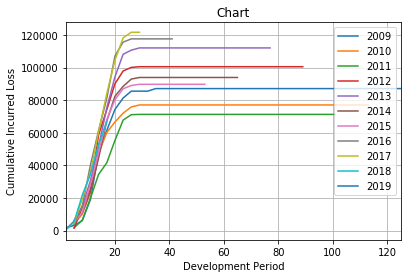

In [8]:
tri_incurred[tri_incurred['Class_name']=='Motor'].grain('OYDQ').T.plot(
    marker='', grid=True,
    title='Chart').set(
    xlabel='Development Period',
    ylabel='Cumulative Incurred Loss')

[Text(0, 0.5, 'Cumulative Paid Loss'), Text(0.5, 0, 'Development Period')]

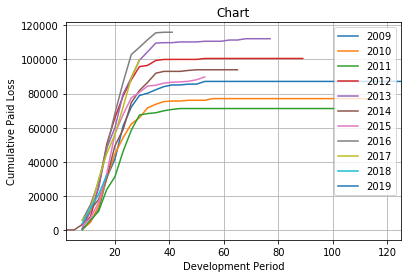

In [6]:
tri_paid[tri_paid['Class_name']=='Motor'].grain('OYDQ').T.plot(
    marker='', grid=True,
    title='Chart').set(
    xlabel='Development Period',
    ylabel='Cumulative Paid Loss')